###  KNN on MNIST data

### Name: Deepak Reddy

### Importing MNIST package to read the downloaded MNIST data

In [23]:
from mnist import MNIST
import numpy as np
import random
import time
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [3]:
mndata = MNIST('KNN')

In [4]:
images_train, labels_train = mndata.load_training()
images_test, labels_test = mndata.load_testing()

images_train  = np.asarray(images_train)
images_test  = np.asarray(images_test)
labels_train = np.asarray(labels_train)
labels_test = np.asarray(labels_test)
print(len(images_train))

60000


In [285]:
index = random.randrange(0, len(images_train))  # choose an index ;-)
print(mndata.display(images_train[index]))


............................
............................
...................@........
...................@........
..................@@........
.................@@.........
................@@..........
................@@..........
...............@@...........
..............@@............
.............@@.............
............@@..............
...........@@...............
...........@....@@@@........
..........@@..@@@@@@........
.........@@..@.....@........
.........@@........@........
........@@..@...............
........@@@@.....@..........
........@@@@..@@@...........
.........@@@@@@.............
..........@@@@@.............
............................
............................
............................
............................
............................
............................


### 1. 1-Nearest neighbor on test set

In [18]:
predict = np.zeros(len(images_test)) 

start = time.clock()
for i in range(len(images_test)):
    diff = images_train - images_test[i]
    dist = np.einsum('ij, ij->i', diff, diff)
    predict[i] = labels_train[np.argsort(dist)[0]]

end = time.clock()
print((end-start))


1030.1677399137916


Calculating error for the 1-NN and ouputting the error for each digit

In [25]:
error = 0
for i in range(len(images_test)):
    if predict[i] != labels_test[i]:
        error = error+1
print("Total Error:", error)
print("Error for the digits :", np.unique(pts, return_counts=True))

#Output confusion matrix 
y_actu = pd.Series(labels_test, name='Actual')
y_pred = pd.Series(predict, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
print(df_confusion)

Total Error: 309
Error for the digits : (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([ 7,  6, 40, 40, 38, 32, 14, 36, 54, 42], dtype=int64))
Predicted  0.0   1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0
Actual                                                      
0          973     1    1    0    0    1    3    1    0    0
1            0  1129    3    0    1    1    1    0    0    0
2            7     6  992    5    1    0    2   16    3    0
3            0     1    2  970    1   19    0    7    7    3
4            0     7    0    0  944    0    3    5    1   22
5            1     1    0   12    2  860    5    1    6    4
6            4     2    0    0    3    5  944    0    0    0
7            0    14    6    2    4    0    0  992    0   10
8            6     1    3   14    5   13    3    4  920    5
9            2     5    1    6   10    5    1   11    1  967


Saving the data in output_1 file

In [19]:
with open('output_1.txt', 'wb') as fp:
    pickle.dump(predict, fp)    

In [16]:
with open ('output_1.txt', 'rb') as fp:
    predict = pickle.load(fp)

Results:
it took 1030 secs to classify all the test set(10000 images) using train set. Then error was calculated which is total mispredicted values(309) for one nearest neighbor. Finally, confusion matrix is generated which represents the correct classification and testing error for test set. We got error of 309 which gives an accuracy of 96.91%.

### 2. Function for leave one out approach applied on images_train set

In [71]:
def leave_one_out(train_set,train_labels):
    predict = []
   
    for i in range(len(train_set)):
        diff = train_set - train_set[i]
        dist = np.einsum('ij, ij->i', diff, diff)

        predict.append(train_labels[np.argsort(dist)[1:21]])
        #    print(mode(nearest)[0][0])

    return(predict)

Performing the leave_one_out function on the whole images_train set(60000 images)

In [291]:
train_set = images_train
train_labels = labels_train
start = time.clock()
predict_k = leave_one_out(train_set,train_labels)
end = time.clock()
print(end-start)
predict_k = np.asarray(predict_k)
#print(predict_k[:10])
print(predict_k.shape)

6307.605931746744
(60000, 20)


Results:
It took 6307 secs to perform leave on out method on train set. Output is 60000by20 matrix where each row is the 20 vector train labels which are closest to that digit. 

Saving the predict_k variable in output_2 file

In [292]:
import pickle
with open('output_2.txt', 'wb') as fp:
    pickle.dump(predict_k, fp)

In [33]:
with open ('output_2.txt', 'rb') as fp:
    predict_k = np.asarray(pickle.load(fp))
print(predict_k.shape)

(60000, 20)


Function for KNN_classifier to operate on 'predict_k' data and outputs error and predict vector for that k value

In [28]:
def KNN_classifier(pred, k, labels):
    error = 0
    pred_label = np.empty(len(pred))
    for i in range(len(pred)):
        predict = pred[i][:k]
        pred_sort = np.unique(predict, return_counts=True)
        pred_label[i] = pred_sort[0][np.argmax(pred_sort[1])]
        if labels[i] != pred_label[i]:
            error = error+1
    return error, pred_label
    

Calculating the error and plotting the error Vs K 

[ 1577.  1926.  1562.  1643.  1635.  1694.  1698.  1751.  1787.  1847.
  1898.  1942.  1946.  2008.  2020.  2046.  2084.  2109.  2158.  2173.]


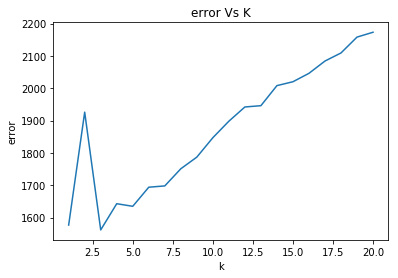

In [35]:
error = np.zeros(20)
for k in range(1,21):
    error[k-1],p = KNN_classifier(predict_k,k,train_labels)
    
print(error)

plt.plot(np.arange(1,21), error)
plt.ylabel('error')
plt.xlabel('k')
plt.title('error Vs K')
plt.show()


Using the images_test 20 NN file output('output_1_k20.txt') generated earlier to find the testing error for best value k = 3  

In [43]:
with open ('output_1_k20.txt', 'rb') as fp:
    predict_3 = np.asarray(pickle.load(fp))
print(predict_3.shape)
error3, predict_3 = KNN_classifier(predict_3, 3, labels_test)
#Output confusion matrix 
y_actu = pd.Series(labels_test, name='Actual')
y_pred = pd.Series(predict_3, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
print("Total error =", error3)
print(df_confusion)

(10000, 20)
Total error = 295
Predicted  0.0   1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0
Actual                                                      
0          974     1    1    0    0    1    2    1    0    0
1            0  1133    2    0    0    0    0    0    0    0
2           10     9  996    2    0    0    0   13    2    0
3            0     2    4  976    1   13    1    7    3    3
4            1     6    0    0  950    0    4    2    0   19
5            6     1    0   11    2  859    5    1    3    4
6            5     3    0    0    3    3  944    0    0    0
7            0    21    5    0    1    0    0  991    0   10
8            8     2    4   16    8   11    3    4  914    4
9            4     5    2    8    9    2    1    8    2  968


Results:
After we get the predict matrix, we use KNN classifier function to get the errors for each K = 1 to 20. Then we select the K index with least error value to get the best value of K equal to 3. This K is applied in KNN classifier applied for predict set test matrix which was generated and stored in 'output_1_k20.txt' in the first part. We get error of 295 for K = 3 on test set which gives accuracy of 97.05%.    

### 3. Function for downsampling the image by factor n

In [296]:
def downsample(img,n):
    no_samples = len(img)//n
    indices = n* (np.arange(no_samples))
    downsamp_img = img[indices]
    return downsamp_img

Procedure to downsample for 4 n values of [2,4,8,16] and calculating error for each n value

In [297]:
final_predict = []
for n in [2, 4, 8, 16]:
    d_img = np.empty([images_train.shape[0],images_train.shape[1]//n])
    for i in range(images_train.shape[0]):
        d_img[i] =  downsample(images_train[i],n)
    print(d_img.shape)
    train_set = d_img
    train_labels = labels_train
    
    start = time.clock()
    predict_k_4 = leave_one_out(train_set,train_labels)
    end = time.clock()
    print(end-start)
    
    predict_k_4 = np.asarray(predict_k_4)
    #print(predict_k_4[:10])
    final_predict.append(predict_k_4)
    
    error = np.zeros(20)
    for k in range(1,21):
        error[k-1], p = KNN_classifier(predict_k_4,k,train_labels)
    print(error)
print(np.asarray(final_predict).shape)
    
import pickle
with open('output_3.txt', 'wb') as fp:
    pickle.dump(final_predict, fp)

(60000, 392)
5780.444989736352
[ 1790.  2191.  1798.  1866.  1811.  1888.  1912.  1959.  2015.  2051.
  2066.  2136.  2156.  2216.  2239.  2297.  2333.  2349.  2377.  2407.]
(60000, 196)
3034.197574892547
[ 4209.  4863.  4037.  4156.  4012.  4113.  4136.  4225.  4254.  4338.
  4356.  4448.  4456.  4557.  4591.  4629.  4698.  4728.  4747.  4811.]
(60000, 98)
1678.574066008092
[ 5110.  5641.  4705.  4687.  4592.  4664.  4637.  4691.  4723.  4762.
  4793.  4865.  4879.  4920.  4970.  5013.  5081.  5129.  5164.  5185.]
(60000, 49)
994.7438328308344
[ 12961.  13330.  11931.  11693.  11441.  11318.  11225.  11169.  11140.
  11233.  11162.  11153.  11162.  11248.  11259.  11284.  11337.  11278.
  11333.  11378.]
(4, 60000, 20)


Results:
Above we output the downsampled train_images matrix shape, querytime and error values for K = 1 to 20 for n = 2, 4, 8 and 16 respectively. Best value of K for n = [2,4,8,16] is [1, 5, 5, 9] respectively.
Accuracy values for n = 2 is 97.04%, n= 4 is 93.31%, n= 8 is 92.34% and n =16 is 81.43%.
We observe that for n = 2, the time is 5780 sec and for n = 4 it is 3034 sec which is almost half and this trend continues for n = 8 and 16. 
Also the error for n = 2 is comparable to original image size and proves that just downsampling by 2 doesn't affect much regarding the error but downsampling by 4, 8 and 16 worsens the prediction.

In [298]:
#with open ('output_k.txt', 'rb') as fp:
#    itemlist = pickle.load(fp)
#print(np.asarray(itemlist).shape)

### 4. Function for smartdownsampling the image by factor n*n  by binning n*n samples

In [6]:
def smartdownsample(img,n):
    img_2D = img.reshape(28,28)
    no_samples = len(img_2D)//n
    img_binned = np.zeros([no_samples,no_samples])
    for i in range(no_samples):
        for j in range(no_samples):
            img_binned[i,j] = img_2D[i*n:(i+1)*n, j*n:(j+1)*n].sum()
    return img_binned            


In [301]:
img_1D = np.empty([images_train.shape[0],images_train.shape[1]//16])
for i in range(images_train.shape[0]):
    img_1 =  smartdownsample(images_train[4],4)
    img_1D[i] = img_1.flatten()
print(img_1D.shape)


(60000, 49)


Procedure to smartdownsample for 4 n values of [2,4,7,14] and calculating error for each n value

In [302]:
final_predict_2D = []
for n in [2, 4, 7, 14]:
    img_1D = np.empty([images_train.shape[0],images_train.shape[1]//(n*n)])
    for i in range(images_train.shape[0]):
        img_1 =  smartdownsample(images_train[i],n)
        img_1D[i] = img_1.flatten()
    print(img_1D.shape)
    train_set = img_1D
    train_labels = labels_train
    start = time.clock()
    predict_k_4_2D = leave_one_out(train_set,train_labels)
    end = time.clock()
    print(end-start)
    predict_k_4_2D = np.asarray(predict_k_4_2D)
    #print(predict_k_4[:10])
    final_predict_2D.append(predict_k_4_2D)
    error = np.zeros(20)
    for k in range(1,21):
        error[k-1], p = KNN_classifier(predict_k_4_2D,k,train_labels)
    
    print(error)
print(np.asarray(final_predict_2D).shape)
import pickle
with open('output_4.txt', 'wb') as fp:
    pickle.dump(final_predict_2D, fp)

(60000, 196)
3032.2206751555495
[ 1376.  1624.  1312.  1367.  1379.  1436.  1442.  1503.  1526.  1583.
  1623.  1655.  1696.  1718.  1740.  1787.  1824.  1819.  1872.  1899.]
(60000, 49)
992.1595230611565
[ 2724.  2967.  2586.  2547.  2633.  2602.  2667.  2694.  2715.  2733.
  2798.  2822.  2886.  2908.  2960.  2968.  3018.  3032.  3088.  3103.]
(60000, 16)
472.90317467445857
[ 11806.  12326.  10730.  10397.  10125.  10075.   9938.   9972.   9941.
   9955.   9929.   9935.   9924.   9930.   9947.  10017.  10085.  10110.
  10168.  10207.]
(60000, 4)
295.6983052152209
[ 35404.  34818.  33517.  32454.  31974.  31447.  31037.  30872.  30573.
  30407.  30271.  30143.  30040.  29957.  29822.  29741.  29636.  29549.
  29470.  29426.]
(4, 60000, 20)


Results:
Above we output the smartdownsampled train_images matrix shape, querytime and error values for K = 1 to 20 for n = 2, 4, 7, 14 respectively. Best value of K for n = [2,4,7,14] is [3, 4, 13, 20] respectively.
Accuracy values for n = 2 is 97.81%, n = 4 is 95.75%, n = 7 is 83.46% and n = 14 is 50.95%.
We observe that for n = 2, the time is 3032 sec same as n = 4 for just downsampled train data and for n = 4 it is 992 sec which is almost one-third. 
Also the error for n = 2 is comparable to original image size error and proves that smartdownsampling by 2 is effective in reducing computing time by 1/2 with almost same error. Smartdownsampling by 4, 8 and 16 worsens the prediction. Still n = 4 gives good trade off for error Vs computing time.

In [79]:
#with open ('output_2.txt', 'rb') as fp:
#    itemlist = pickle.load(fp)
#print(np.asarray(itemlist).shape)

### 5. Applying smartdownsampling for n = 28  

In [58]:
n = 28
img_1D = np.empty([images_train.shape[0],images_train.shape[1]//(n*n)])
for i in range(images_train.shape[0]):
    img_1 =  smartdownsample(images_train[i],n)
    img_1D[i] = img_1.flatten()
print("Shape of smartdownsampled image:", img_1D.shape)
train_set = img_1D
train_labels = labels_train
start = time.clock()
predict_k_28_2D = leave_one_out(train_set,train_labels)
end = time.clock()
print("Query time:",end-start)
predict_k_28_2D = np.asarray(predict_k_28_2D)

error = np.zeros(20)
for k in range(1,21):
    error[k-1], p = KNN_classifier(predict_k_28_2D,k,train_labels)
    
print("Error value for K = 1 to 20:",error)
print("Shape of predict matrix for K =20:", predict_k_28_2D.shape)
print("Best value of k:", np.argmin(error)+1)

Shape of smartdownsampled image: (60000, 1)
Query time: 236.2747735019293
Error value for K = 1 to 20: [ 36324.  38708.  39714.  40324.  40800.  41342.  41878.  42290.  42550.
  42861.  42968.  43242.  43394.  43573.  43632.  43848.  43974.  44068.
  44114.  44189.]
Shape of predict matrix for K =20: (60000, 20)
Best value of k: 1


Using best value of k = 1 from above leave one out approach and applying it to test_images to get the error and confusion matrix

In [53]:
n = 28
img_1D_test = np.empty([images_test.shape[0],images_test.shape[1]//(n*n)])
for i in range(images_test.shape[0]):
    img_1 =  smartdownsample(images_test[i],n)
    img_1D_test[i] = img_1.flatten()
print("Feature matrix:", img_1D_test.shape)
test_set = img_1D_test
test_labels = labels_test
start = time.clock()
predict_k_28_2Dtest = leave_one_out(test_set,test_labels)
end = time.clock()
print("Query time: ", end-start)
predict_k_28_2Dtest = np.asarray(predict_k_28_2Dtest)

errortest, p = KNN_classifier(predict_k_28_2Dtest,1,test_labels)
print("Total Error:", errortest)
print("Predicted matrix shape for k=20:", predict_k_28_2Dtest.shape)

Feature matrix: (10000, 1)
Query time:  5.367129097885481
Total Error: 7201
Predicted matrix shape for k=20: (10000, 20)


In [50]:
#Output confusion matrix 
y_actu = pd.Series(test_labels, name='Actual')
y_pred = pd.Series(p, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
print(df_confusion)

Predicted  0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0
Actual                                                     
0          257   14  140  107   67   67  102   51  120   55
1           14  662   37   36   93   60   41  110   15   67
2          120   40  262   90   83   71   88   82  111   85
3          116   44   90  239   67   83   94   87   93   97
4           57   88   75   73  249   83   89   97   86   85
5           54   58   72   93   86  211   65   81   82   90
6          104   43   95   91   89   78  198   63   97  100
7           57  106   75   87  104   88   71  276   59  105
8          134   26  114   97   69  103   83   55  209   84
9           65   62   76   81  100   86  101  115   87  236


Results:
For n = 28 smart downsampling we have only one feature for image and the error is almost for half of predictions. We can see confusion matrix above for k = 1 which gives error for each digit. From confusion matrix it is seen that digit 1 is givivng best predicton. Accuracy on test set is 27.99%.


### 6. Using PCA for feature transformation and applying it for predicting test set

Procedure:
I used Principal Component Analysis method for feature transformation. I used the svd_pca function to implement using singular value decomposition. Input to function is whole set of images_train and images_test vertically stacked in to one matrix of shape  of 70000by784. 
After passing this matrix as data with k value of 40 as input to svd_pca function, i got output of 70000by40 feature transformed matrix. In effect, we are transforming the 784 vector in to 40 dimension vector. I applied leave one out on the train pca set of 60000 samples. Then i compared the last 10000 samples which are the test_images samples with the first 60000 samples to predict the test digits using the train set. We then proceed with KNN method already used above where we get the best value of KNN and use it on test set.  


In [56]:
def svd_pca(data, k):
    """Reduce DATA using its K principal components."""
    data = data.astype("float64")
    data -= np.mean(data, axis=0)
    U, S, V = np.linalg.svd(data, full_matrices=False)
    return U[:,:k].dot(np.diag(S)[:k,:k])

Applying leave one out on train set and classifying test set using train set to get the predict matrices

In [73]:
img_pca_1 = np.vstack([images_train[:len(images_train)],images_test[:10000]])
print("Data input shape of train and test original images:", img_pca_1.shape)

img_pca_1 = svd_pca(img_pca_1,40)
print("Data input shape of train and test pca images:", img_pca_1.shape)

predict_pca_train = [] 
predict_pca_test =[]
start = time.clock()

#Applying leave one out on train set(first 60000 samples)
train_set = img_pca_1[:len(images_train)]
train_labels = labels_train
predict_pca_train = leave_one_out(train_set,train_labels)

#Test set classification using train set(last 10000 samples)
for i in range(len(images_train), len(img_pca_1)):
    diff = img_pca_1[:len(images_train)] - img_pca_1[i]
    dist = np.einsum('ij, ij->i', diff, diff)
    predict_pca_test.append(labels_train[np.argsort(dist)[:20]])

end = time.clock()
print("Query time:", (end-start))
predict_pca_train = np.asarray(predict_pca_train)
predict_pca_test = np.asarray(predict_pca_test)
print("predict_train shape for KNN =20:", predict_pca_train.shape)
print("predict_test shape for KNN =20:", predict_pca_test.shape)

with open('output_5.txt', 'wb') as fp:
    pickle.dump(predict_pca, fp)

Data input shape of train and test original images: (70000, 784)
Data input shape of train and test pca images: (70000, 40)
Query time: 1003.2450085749624
predict_train shape for KNN =20: (60000, 20)
predict_test shape for KNN =20: (10000, 20)


To obtain best KNN value from predict_pca variable and generating confusion matrix for best value of KNN 

In [74]:
for k in range(1,21):
    error[k-1], p = KNN_classifier(predict_pca_train,k,train_labels)
    
print("Error for KNN = 1 to 20:", error)
print("Best value of k:", np.argmin(error)+1, "Error:", error[np.argmin(error)])

Error for KNN = 1 to 20: [ 1344.  1540.  1284.  1333.  1315.  1364.  1347.  1382.  1419.  1432.
  1474.  1521.  1557.  1582.  1613.  1658.  1679.  1691.  1735.  1753.]
Best value of k: 3 Error: 1284.0


In [78]:
#Output confusion matrix for K = 3
errortest, p = KNN_classifier(predict_pca_test,3,labels_test)
y_actu = pd.Series(labels_test, name='Actual')
y_pred = pd.Series(p, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
print("Error:", errortest)
print(df_confusion)

Error: 256
Predicted  0.0   1.0   2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0
Actual                                                       
0          975     1     1    0    0    1    1    1    0    0
1            0  1131     3    0    0    0    0    0    0    1
2            5     1  1010    1    0    0    2   11    2    0
3            0     1     4  973    1   13    0    6   10    2
4            2     0     0    0  954    0    4    1    1   20
5            5     2     0   11    2  862    4    1    2    3
6            4     4     0    0    3    1  945    0    1    0
7            0    15     9    1    2    0    0  992    0    9
8            4     0     4   16    2    7    3    3  931    4
9            6     4     3    7    8    2    1    2    5  971


Results:
PCA gives the output in k coloumn vectors which can be defined in svd_pca function. In my case, i took k = 40 which transforms 70000by784 matrix to 70000by40 matrix which consists of 40 most important pca vectors of the images.  

Applied KNN method for K = 1 to 20 values and error was output for each K value. Then least error value is chosen to be best value of K which is then used to generate confusion matrix.

The prediction accuracy is better after pca transformation which can be seen from change of error value of 295 for K =3 for original test set and error value of 256 for K = 3 for PCA transformed test set.

Query time also reduced by approximately 7 times after pca transformation when compared with original images. For instance, it took 6307 secs for leave one out and 1030 secs for images_test prediction using train set which gives a total of 7337 secs execution time. In contrast, it took total of 1003 secs combined for both leave one out and test set prediction for PCA method.

Accuracy after PCA transformation on test set is 97.44%.

References:
https://steven.codes/blog/ml/how-to-get-97-percent-on-MNIST-with-KNN/